Task 0: Vanishing EM Fields
===




Derivation
---

If we expand a function $f(x)$ about a point $x_0$ with an offset of $\pm \delta/2$ using the Taylor series, we can obtain an expression for the derivative

\begin{equation}
\left . \dfrac{ \mathrm{d} f}{\mathrm{d} x} \right |_{x=x_0} \approx \dfrac{ f(x+\delta/2) - f(x-\delta/2) }{\delta}
\end{equation}

Note that we ssumed that the offset $\delta$ is very small, hence we can drop the higher-order terms that appear in the Taylor expansion. 

We use the Yee algorithm for Finite Difference Time Domain (FDTD), first proposed by Kane Yee in 1966, which uses second-order central differences. This algorithm can be summarized as follows: we first obtain expressions for the electromagnetic field using Ampere's and Faraday's Laws, then discretize them in space and time. From this, we then solve for the fields - first the magnetic, then the electric - one time step at a time starting from a set of initial conditions, until we reach the final time step.

We begin using one-dimensional forms of the Ampere and Faraday laws in electrodynamics

\begin{equation}
\mu \dfrac{\partial H_y}{\partial t} = \dfrac{\partial E_z}{\partial x}
\qquad\qquad
\epsilon \dfrac{\partial E_z}{\partial t} = \dfrac{\partial H_y}{\partial t}
\end{equation}

Now we transform the continuous space and time coordinates into discrete steps - the spatial coordinates will go as ${ \Delta x, \Delta x + \Delta x,..., m\Delta x, ...}$, whereas the temporal coordinates are written as ${ \Delta t, \Delta t + \Delta t,..., q\Delta t, ...}$. From this point, we will simply use $m$ a the coordinate along x and $q$ as the time, with $\Delta x$ and $\Delta t$ referring to the time step in the simulation.

For Faraday's Law at point $(q, m+1/2)$, we have

\begin{equation}
\mu \dfrac{1}{\Delta t} \left (H_y \Big |^{q+1/2}_{m+1/2} - H_y \Big |^{q-1/2}_{m+1/2} \right ) = \dfrac{1}{\Delta x} \left ( E_z \Big |^{q}_{m+1} - E_z \Big |^{q}_{m} \right )
\end{equation}

and solving for $H_y \Big |^{q+1/2}_{m+1/2}$,

\begin{equation}
H_y \Big |^{q+1/2}_{m+1/2} = H_y \Big |^{q-1/2}_{m+1/2} + \dfrac{1}{\mu} \dfrac{\Delta t}{\Delta x} \left ( E_z \Big |^{q}_{m+1} - E_z \Big |^{q}_{m} \right )
\end{equation}

This is known as the updatee equation for the magnetic field. Using the known value of $H_y$, that is, at point $q-1/2$, we use this, and the electric field to update the magnetic field at the next time step. 

Similarly for Ampere's Law, at point $(q+1/2, m)$, we have
\begin{equation}
\epsilon \dfrac{1}{\Delta t} \left ( E_z \Big |^{q+1}_{m} - E_z \Big |^{q}_{m} \right ) = \dfrac{1}{\Delta x} \left ( H_y \Big |^{q+1/2}_{m+1/2} - H_y \Big |^{q+1/2}_{m-1/2} \right )
\end{equation}

solving for $E_z \Big |^{q+1}_{m}$,

\begin{equation}
E_z \Big |^{q+1}_{m} = E_z \Big |^{q}_{m} + \dfrac{1}{\epsilon} \dfrac{\Delta t}{\Delta x} \left ( H_y \Big |^{q+1/2}_{m+1/2} - H_y \Big |^{q+1/2}_{m-1/2} \right )
\end{equation}

The ratios $\dfrac{1}{\epsilon} \dfrac{\Delta t}{\Delta x}$ and $\dfrac{1}{\mu} \dfrac{\Delta t}{\Delta x}$ can be written as

\begin{equation}
\dfrac{1}{\epsilon} \dfrac{\Delta t}{\Delta x} = \dfrac{\eta_0}{\epsilon_r} S_c
\end{equation}

\begin{equation}
\dfrac{1}{\mu} \dfrac{\Delta t}{\Delta x} = \dfrac{1}{\mu_r \eta_0} S_c
\end{equation}

where $\epsilon_r$ and $\mu_r$ are the relative permittivity and permeability of the material in which the field propagates in, $\eta_0$ is the impedance of free space defined by

\begin{equation}
\eta_0 = \sqrt{\dfrac{\mu_0}{\epsilon_0}}
\end{equation}

and $S_c$, the Courant number, is defined as the ratio

\begin{equation}
S_c = \dfrac{c \Delta t}{\Delta x}
\end{equation}

For this case, we will use a Courant number of unity.

Given these definitions, we have the update equations for the magnetic and electric fields as

\begin{equation}
H_y \Big |^{q+1/2}_{m+1/2} = H_y \Big |^{q-1/2}_{m+1/2} + \dfrac{1}{\mu_r \eta_0} S_c \left ( E_z \Big |^{q}_{m+1} - E_z \Big |^{q}_{m} \right )
\end{equation}

\begin{equation}
E_z \Big |^{q+1}_{m} = E_z \Big |^{q}_{m} + \dfrac{\eta_0}{\epsilon_r} S_c \left ( H_y \Big |^{q+1/2}_{m+1/2} - H_y \Big |^{q+1/2}_{m-1/2} \right )
\end{equation}

If the fields were in vacuum, $\epsilon_r$ and $\mu_r$ are equal to one.

Now we add a source to the simulation. We return to Ampere's Law, with the term for the current density

\begin{equation}
\nabla \times \mathbf H = \mathbf J + \epsilon \dfrac{ \partial \mathbf E}{\partial t}
\end{equation}

For the one-dimensional case, we can rearrange this to

\begin{equation}
\dfrac{\partial E_z}{\partial t} = \dfrac{1}{\epsilon} \dfrac{\partial H_y}{\partial x} - \dfrac{1}{\epsilon} J
\end{equation}

And applying the same process as previously shown, the update equation for $E_z$ is

\begin{equation}
E_z \Big |^{q+1}_{m} = E_z \Big |^{q}_{m} + \dfrac{\eta_0}{\epsilon_r} S_c \left ( H_y \Big |^{q+1/2}_{m+1/2} - H_y \Big |^{q+1/2}_{m-1/2} \right ) - \dfrac{\Delta t}{\epsilon} J \Big |^{q+1/2}_{m}
\end{equation}

In order to be able to use the previous expression for the update equation, we can write 

\begin{equation}
E_z \Big |^{q+1}_{m} = E_z \Big |^{q+1}_{m} - \dfrac{\Delta t}{\epsilon} J \Big |^{q+1/2}_{m}
\end{equation}

after the code runs the previous line. 

Python Implementation
---

We begin with importing relevant libraries for displaying the fields (matplotlib/pyplot), for the arrays (numpy), and for the function of the source (math). A variable "fignum" is also initialized in order to create multiple separate figures of the fields as it progresses in time.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import math as m

fignum = 0

The size nx of the spatial domain is chosen arbitrarily. The source is located at the center, and the width is also selected at random. Since we are defining the domain directly using integers, $\Delta x$ and $\Delta t$ are equal to 1; with the Courant number set to unity, this also means that the speed of light is defined as 1.

A time delay is introduced in the source. In order to see the field as it vanishes, the time domain size is set as the sum of the space domain and the delay of the source.

In [2]:
nx = 300            #spatial domain size
srcori = int(nx/2)  #source location
srcwid = 5          #source width
srcdel = 15*srcwid  #source delay
nt = nx+srcdel      #temporal domain size

imp0 = 337.0 #impedance

Here, the electric and magnetic fields are initialized to zero, and an array for the spatial coordinates from 0 to nx-1 is created.

In [3]:
ez = np.zeros(nx)
hy = np.zeros(nx)
x = np.arange(0,nx-1,1)

The fields are calculated one time step at a time in this loop. The source is defined as a Gaussian function. 

The if statement from line 7 onwards is used to plot the fields. We note that the first plot generated is not completely zero, but instead a very small spike at the location of the additive source. As the source delay is increase, the spike also decreases in magnitude. 

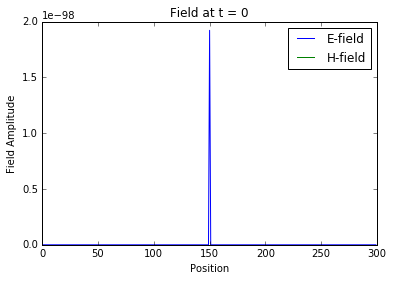

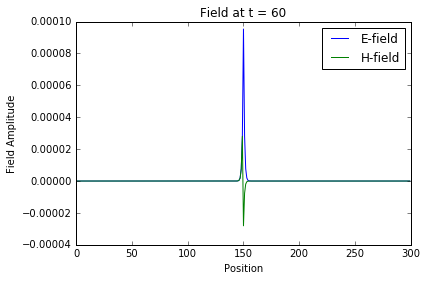

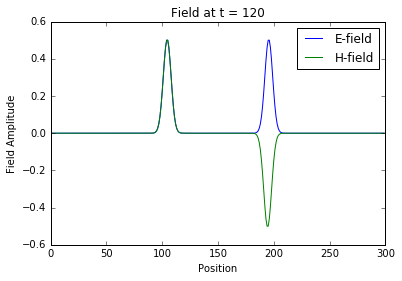

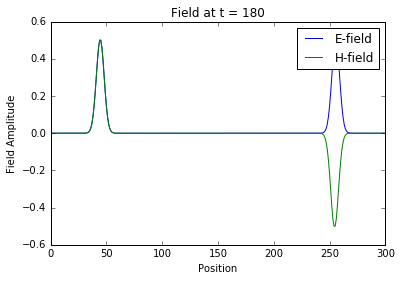

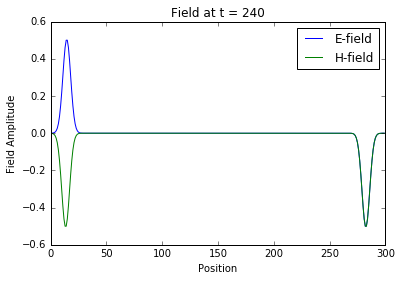

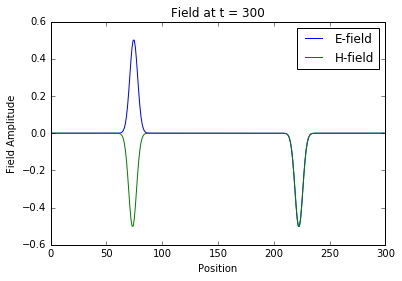

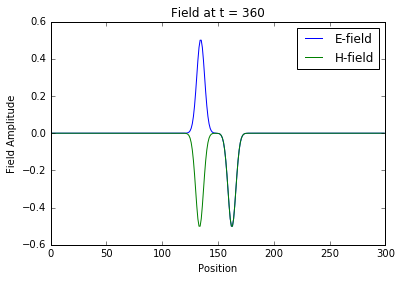

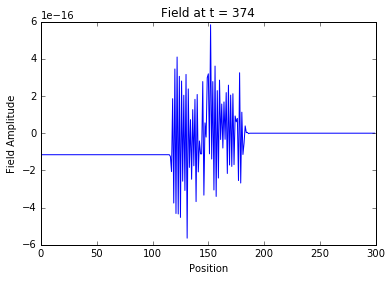

In [4]:
plt.hold(True)
for dt in range(0,nt):
    hy[x] = hy[x] + (ez[x+1]-ez[x])/imp0
    ez[x] = ez[x] + (hy[x]-hy[x-1])*imp0

    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))
    
    if (dt % 60 == 0 or dt == nt-1):
        fignum += 1
        plt.figure(fignum)
        plt.xlabel("Position")
        plt.ylabel("Field Amplitude")
        plt.title("Field at t = "+ str(dt))        
        plt.plot(ez, label="E-field")
        
        if (dt != nt-1):
            plt.plot(hy*imp0, label="H-field")
            plt.legend()

References
---

Schneider, J. B. *Understanding the finite-difference time-domain method*. School of electrical engineering and computer science Washington State University.–URL: http://www. Eecs. Wsu. Edu/∼ schneidj/ufdtd/(request data: 29.11. 2012) (2010).